# 导入数据

In [12]:
# -*- coding: cp936 -*-
import pandas as pd

from pymongo import MongoClient
import cgi
import re,datetime,json,time
import csv,xlrd,xlwt
#设置try的次数
#from docx import Document
#from docx.shared import Pt
#from docx.shared import Inches
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  
client=MongoClient('mongodb://root:' + '5768116' + '@121.196.220.14')
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) #用于在散点图中输出中文
font_set2 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=9) #用于在散点图中输出中文
import matplotlib as mpl   #显示中文
#from sklearn import metrics
#from sklearn import preprocessing, cross_validation, svm
#from sklearn.model_selection import train_test_split   #这里是引用了交叉验证 
#from sklearn.linear_model import LinearRegression
#import json

#import statsmodels.api as sm
import numpy as np
import pandas as pd
db = client.jishi  
collection = db.jishi  

db2 = client.huiguang  
collection2 = db2.huiguang  

db3 = client.huiguangzhu  
collection3 = db3.huiguangzhu  

db4 = client.tongxun  
collection4 = db4.tongxun

db5 = client.piaofen
collection5 = db5.piaofen

db6 = client.piaofenxi
collection6 = db6.piaofenxi

db9 = client.zixun
collection9 = db9.zixun

db10=client.tongxun
collection10 = db10.tongxun

db11=client.cundan
collection11 = db11.cundan

db12=client.xianxia
collection12 = db12.xianxia

db13=client.number
collection13 = db13.number

db14=client.piaojiaosuo2
collection14 = db14.piaojiaosuo2

db15=client.cundanbank
collection15 = db15.cundanbank
    
db16=client.guogu
collection16 = db16.guogu

db17=client.yucebiao
collection17 = db17.yucebiao

db19=client.cundanfenxi
collection19 = db19.cundanfenxi



# 央行公开操作和离岸人民币

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
import re,datetime,json,time
from pymongo import MongoClient


client=MongoClient('mongodb://root:' + '5768116' + '@121.196.220.14')
shijian=time.strftime('%Y-%m-%d',time.localtime(time.time()))

shijian2=time.strftime('%Y-%m-%d',time.localtime(time.time()))
import datetime
shijian2 = datetime.datetime.strptime(shijian2, "%Y-%m-%d")
shijian2=str(shijian2.strftime("%Y-%m-%d"))

jin=input('    请输入要统计本期日期（请跳过节假日）,输入格式为“2017-11-01”不输入自定义为今天:')
if jin!='':
       shijian2=jin




#lianjiez=''
chrome_options = Options()
# 无头模式启动
chrome_options.add_argument('--headless')
# 谷歌文档提到需要加上这个属性来规避bug
chrome_options.add_argument('--disable-gpu')


def gongkai():
    print('开始执行公开操作爬取程序……')
    db = client.zixun
    collection = db.zixun
    cursor = collection.find({'权重':'央行政策'})
    zixun_df= pd.DataFrame(list(cursor))
    lianjiez=(zixun_df['链接'].tolist())

# 初始化实例
    driver= webdriver.Chrome(chrome_options=chrome_options)
    time.sleep(2) 
# 请求公开市场主页
    es=driver.get("http://www.pbc.gov.cn/zhengcehuobisi/125207/125213/125431/index.html")
    d=driver.find_elements_by_xpath('//td[@class="unline"]/a')
    e=driver.find_elements_by_xpath('//td[@class="unline"]')
    shijian=time.strftime('%Y-%m-%d',time.localtime(time.time()))

# 遍历整个列表
    for i in range(0,len(e)):
        cont=''
        biaotou=''
        biaonei=''
        lianjie=d[i].get_attribute('href')
        if lianjie  not in lianjiez:     #打开主页
           title=d[i].get_attribute('title')
           date=e[i].find_elements_by_xpath('.//following-sibling::span')[0].text
           time.sleep(2) 

           es2=driver.get(lianjie)
           t=driver.find_elements_by_xpath('.//div[@id="zoom"]')
           for i in t:
             string=re.split('\n',i.text)
             for i in range (1,len(string)):
               zhaop2=re.search('^((?!(MLF|二〇一八|。|，)).)*([\u4e00-\u9fa5]{0,4})(?:期限|名称|利率|量|日)',string[i])  #如11-12月
               if zhaop2:

                 biaotou=biaotou+'    '+string[i]

             
               zhaop2=re.search('([\d]{1,5}(?:天|年|亿元|%|日))',string[i])  #如11-12月
               if zhaop2:
                   biaonei=biaonei+'    '+string[i]

           time.sleep(2)
           driver.back()  # 再回到主页
           es=driver.get("http://www.pbc.gov.cn/zhengcehuobisi/125207/125213/125431/index.html")
           d=driver.find_elements_by_xpath('//td[@class="unline"]/a')
           e=driver.find_elements_by_xpath('//td[@class="unline"]')



           cont='    '+string[0]+'<br>'+biaotou+'<br>'+biaonei       
        
           gongkai=pd.DataFrame({'时间': [date],
                          '标题': [title],
                          '链接': [lianjie],
                          '内容':[cont],
                          '爬取日期':[shijian],
                          '权重':['央行政策'],
                          '序号':[''],
                          '网站':['人民银行'],
                          '国外':['']
                         })
           records = json.loads(gongkai.T.to_json()).values()
           collection.insert(records)


        else:
            print('已更新')
    print("Clean...")
    driver.close()
    driver.quit()


def waihui():
    print('开始执行外汇爬取程序……')

    
    driver= webdriver.Chrome(chrome_options=chrome_options)

    driver.get('https://finance.sina.com.cn/money/forex/hq/USDCNH.shtml')
    time.sleep(2)

    price_0 = driver.find_element_by_xpath("//div[@id='quoteWrap']")
    string=re.split('\n',price_0.text)
    
    print(string[2][:10])
    db2 = client.waihui
    collection2 = db2.waihui
    cursor = collection2.find({'日期':string[2][:10]})
    df3= pd.DataFrame(list(cursor))
    if df3.empty:
        waihui=pd.DataFrame({'日期': [string[2][:10]],
                          '现价': [string[0]],
                          '开盘': [string[4]],
                          '昨收':[string[6]],
                          '振幅':[string[8]],
                          '波幅':[string[10]],
                          '最低':[string[12]],
                          '最高':[string[14]]
                          })


        records = json.loads(waihui.T.to_json()).values()
        collection2.insert(records)

    else:
        print(df3)
        print('已经爬过')
    #baojia = '当前美元人民币离岸价为：'+price_0.text
    #print(baojia)
    driver.quit()
    

def gongkai2():
    lianjiez=[]
    db = client.yinhangjian          #得到数据库
    collection = db.yinhangjian    
    
# 初始化实例
    driver= webdriver.Chrome(chrome_options=chrome_options)
# 打开主页
    es=driver.get("http://www.chinamoney.com.cn/chinese/mkdatapm/")
    time.sleep(5) 

    stime=driver.find_elements_by_xpath('.//div[@class="san-grid-f-r"]//span')

    date0=stime[0].text.split(' ')[0]
    time0=stime[0].text.split(' ')[1]

    d=driver.find_elements_by_xpath('.//ul[@class="san-tabs-a"]//a')

    zong=pd.DataFrame({ })
    for i in range(0,2):
        d[i].click()
        time.sleep(10) 
        t=driver.find_elements_by_xpath('.//table[@class="san-sheet-alternating"]//tr')
        print(len(t))
        for j in range(1,len(t)):
      

            
            
            if t[j].text!='' and '品种' not in t[j].text:
                zong1=pd.DataFrame({'品种': [t[j].text.split(' ')[0]],
                               '加权利率': [t[j].text.split(' ')[1]],
                                '最新利率': [t[j].text.split(' ')[2]],
                                '日期':[date0],
                                '时间':[time0],
                                '品种2':[i]
                         })
                zong=pd.concat([zong,zong1])
        zong= zong.reset_index(drop=True)    #重新定义索引

        print(zong)
        
        records = json.loads(zong.T.to_json()).values()
        collection.insert(records)
      
        zong=pd.DataFrame({ })


            



            

    print("Clean...")
    driver.close()
    driver.quit()    
    
gongkai()
gongkai2()

waihui()


    请输入要统计本期日期（请跳过节假日）,输入格式为“2017-11-01”不输入自定义为今天:
开始执行公开操作爬取程序……


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: use options instead of chrome_options


已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
已更新
Clean...


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:152: DeprecationWarning: use options instead of chrome_options


33
        品种    加权利率    最新利率     日期     时间  品种2
0  DIBO001  2.6091  2.5000  10-31  17:00    0
1  DIBO007  2.7373  2.6850  10-31  17:00    0
2  DIBO014  2.7848  2.7900  10-31  17:00    0
3  DIBO021  2.7500  2.7500  10-31  17:00    0
4   DIBO1M  3.6800  3.6800  10-31  17:00    0
5   DIBO2M  3.0661  2.9000  10-31  17:00    0
6   DIBO3M  3.7826  3.8000  10-31  17:00    0
7   DIBO4M  4.2000  4.2000  10-31  17:00    0
33
      品种    加权利率    最新利率     日期     时间  品种2
0  DR001  2.5950  2.6000  10-31  17:00    1
1  DR007  2.6962  2.4000  10-31  17:00    1
2  DR014  2.7199  2.7000  10-31  17:00    1
3  DR021     ---     ---  10-31  17:00    1
4   DR1M  2.7474  2.7500  10-31  17:00    1
5   DR2M  2.7626  2.8000  10-31  17:00    1
6   DR3M  3.1500  3.1500  10-31  17:00    1
7   DR4M  3.2000  3.2000  10-31  17:00    1
Clean...
开始执行外汇爬取程序……


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: DeprecationWarning: use options instead of chrome_options


2019-10-31


#  下载同业存单

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time,os
import pandas as pd
import re,datetime,json,time
from pymongo import MongoClient

import pandas as pd


#lianjiez=''
chrome_options = Options()
# 无头模式启动
chrome_options.add_argument('--headless')
# 谷歌文档提到需要加上这个属性来规避bug
chrome_options.add_argument('--disable-gpu')




global base_path
profile = {
    'download.default_directory': "D:\\downloadFiles"
}
chrome_options = webdriver.ChromeOptions()
chrome_options.add_experimental_option('prefs', profile)
#driver = webdriver.Chrome(executable_path='../common/chromedriver', options=chrome_options)
#driver.implicitly_wait(10)


def gongkai():
  #  options = webdriver.ChromeOptions()
  #  prefs = {'profile.default_content_settings.popups': 0, 'download.default_directory': 'd:\\'}
  #  options.add_experimental_option('prefs', prefs)
    driver = webdriver.Chrome(chrome_options=chrome_options)


    maxTryNum=32

# 初始化实例
   # driver= webdriver.Chrome(chrome_options=chrome_options)


#一、打开首页读取待发行
    es=driver.get("http://www.chinamoney.com.cn/r/cms/chinese/chinamoney/html/member/an/ir-pricing-interbank-cd-info-full.html?enty=&bondCode=&beginDate=2019-04-10&endDate=2019-05-10&couponType=&bondPeriod=&issueStType=1")
    time.sleep(3)  #3秒钟，等网页打开了之后再寻找元素
    d=[]
  #  d=driver.find_elements_by_xpath('.//div[@class="san-sheet"]')
   # print(d)
   # stop
    for tries in range(maxTryNum):
            if len(d)!=0 :
                break
            else:
                if tries < (maxTryNum - 1):
                    d=driver.find_elements_by_xpath('.//a[@class="san-btn san-btn-primary"]')
                    print(tries)
                    continue
                else:
                    print("您的网络较差，无法连接")
                    return   
    
    print(d[1].text)
    os.remove("D:\downloadFiles\同业存单待发行信息表.xlsx")
    d[1].click()


    


    aElements = driver.find_elements_by_xpath('.//li[@class="last-child"]/a')        
    for name in aElements:
            print(name.text)

            if(name.get_attribute("href") is not None and "javascript:void" in name.get_attribute("href")):
                time.sleep(5)  #3秒钟，等网页打开了之后再寻找元素
                print("按钮点击完")   #点击按钮下载
                name.click()
                break        
        
    time.sleep(3)

    
    d=[]
   # stop
    for tries in range(maxTryNum):
            if len(d)!=0 :
                break
            else:
                if tries < (maxTryNum - 1):
                    d=driver.find_elements_by_xpath('.//a[@class="san-btn san-btn-primary"]')
                    print(tries)
                    continue
                else:
                    print("您的网络较差，无法连接")
                    return   
    
    print(d[1].text)
    os.remove("D:\downloadFiles\同业存单发行结果信息表.xlsx")

    d[1].click()
  
    time.sleep(3)  #3秒钟，等网页打开了之后再寻找元素

        
        
        
        
    print("Clean...")
    driver.close()
    driver.quit()
gongkai()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: use options instead of chrome_options


0
下载
发行结果信息表
按钮点击完
0
下载
Clean...


# 更新同业存单数据

In [4]:
client=MongoClient('mongodb://root:' + '5768116' + '@121.196.220.14')
import matplotlib as mpl   #显示中文
#from sklearn import metrics
#from sklearn import preprocessing, cross_validation, svm
#from sklearn.model_selection import train_test_split   #这里是引用了交叉验证 
#from sklearn.linear_model import LinearRegression
#import json
import urllib,math,numpy

#import statsmodels.api as sm
import numpy as np
import pandas as pd

db11=client.cundan
collection11 = db11.cundan


db15=client.cundanbank
collection15 = db15.cundanbank

db19=client.cundanfenxi
collection19 = db19.cundanfenxi
def cundan():
    print('开始执行存单数据更新程序并制作表格……')

    global collection11,collection15,collection19,shijian2


    cursor = collection15.find()
    cundanbank_df= pd.DataFrame(list(cursor))

    df=pd.read_excel('D:\downloadFiles\同业存单待发行信息表.xlsx',encoding='GB18030')

    df=df[ df['发行日期']==df.loc[1,'发行日期'] ]

  #  url='dai.csv'
  #  df = pd.read_table(url,sep=',',encoding='GB18030')   #用dictreader根据行内容查找

    dai=df.loc[(len(df)-5),'发行日期']
    dai=dai.replace('/','-')

    dai = datetime.datetime.strptime(dai, "%Y-%m-%d")
    dai=str(dai.strftime("%Y-%m-%d"))




 #   ur2='fa.csv'
 #   df2 = pd.read_table(ur2,sep=',',encoding='GB18030')   #用dictreader根据行内容查找
    df2=pd.read_excel('D:\downloadFiles\同业存单发行结果信息表.xlsx',encoding='GB18030')

    for i in range(0,len(df2)):
       if df2.loc[i,'实际发行量（亿元）'] =='--':
          df2.loc[i,'实际发行量（亿元）']=9999

    df2=df2[(df2['实际发行量（亿元）']!=9999) &(df2['发行日期']==df2.loc[1,'发行日期'])]
    
    df3=pd.concat([df,df2])

    df3.rename(columns={'主体评级':'评级','存单代码':'债券代码','存单简称':'发行人','发行日期':'发行日','票面利率(%)':'票面利率','参考收益率(%)':'收益率','实际发行量（亿元）':'实际发行(亿)','计划发行量（亿元）':'计划发行(亿)'}, inplace=True)
    df3['爬取日期']=shijian2
    df3['发行日'] = pd.to_datetime(df3['发行日']).astype('str')  #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式

    df3=df3.reset_index(drop = False)

    for i in range(0,(len(df3)-2)):
        dd=str(df3.loc[i,'发行日'])

        df3.loc[i,'发行日']=dd.replace('/','-')

    df3['银行分类']='城商'

#加上银行类别
    for j in range(0,len(df3)):
        for i in range(0,len(cundanbank_df)):
            if cundanbank_df.astype(str).loc[i,'银行'].strip() in df3.loc[j,'发行人']:
                     df3.loc[j,'银行分类']=cundanbank_df.astype(str).loc[i,'分类'].strip()
                     break

#判断如果是数据已经储存过，就不再执行    
    cursor = collection11.find({'发行日':dai })
    cundan_df= pd.DataFrame(list(cursor))
    if len(cundan_df)>=6:
       print('    已经更新过数据。')
       print('    终止。')
      # return



    else:
 
        records = json.loads(df3.T.to_json()).values()   #将数据放到服务器
        collection11.insert(records)
        collection11.remove({ "$or":[{'发行人':'中国货币网'},{'发行人':'www.chinamoney.com.cn'}] })
        print('    存单数据更新完成,%s。'%(shijian2))






 #将最新的数据插入到cundanfenxi中。
 
   # cursor = collection11.find({ "$and":[{    "$or":[{'发行日':shijian2},{'发行日':shijian3}]} ,{'爬取日期':shijian2} ] })
    cursor = collection11.find({ "$and":[{'爬取日期':shijian2} ] })

    
    cundan_df= pd.DataFrame(list(cursor))
    data0=cundan_df[['发行人','发行日','期限','实际发行(亿)','票面利率','收益率','计划发行(亿)','银行分类','评级']]
    data0['发行日'] = pd.to_datetime(data0['发行日']).astype('str')  #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式


    data0['收益率']=data0['收益率'].astype(str)
    print(data0)


    for i in range(0,len(data0)):
        if ('Shibor') in str(data0.loc[i,'收益率']) or ('--') in str(data0.loc[i,'收益率']):
            
            if data0.loc[i,'计划发行(亿)']!='':
            
               data0.loc[i,'收益率']=0 
            else:
            
              if (('--') in str(data0.loc[i,'票面利率'])) or (data0.loc[i,'票面利率'] is None) :
                data0.loc[i,'收益率']='999'            
              else:
                data0.loc[i,'收益率']=data0.loc[i,'票面利率']
    print(data0)
   # stop
    data0=data0[(data0['收益率'] !='999')]
    print(data0)
    #data0.to_excel('666.xls')
   # stop
    data0['收益率'] = data0['收益率'].astype('float')
    data0['实际发行(亿)'] = data0['实际发行(亿)'].astype('float')
    data0['计划发行(亿)'] = data0['计划发行(亿)'].astype('float')

    data0['ji1']=data0['收益率']*data0['实际发行(亿)']
    data0['ji2']=data0['收益率']*data0['计划发行(亿)']
    biao0=data0[['发行日','期限','实际发行(亿)','计划发行(亿)','ji1','ji2','银行分类','评级']]


#算AAA级的收益率
    biao3=biao0[(biao0['评级']=='--/AAA') |(biao0['评级']=='AAA')]
    biao3=biao3.groupby(['发行日','期限','银行分类']).sum()
    biao3['实际加权利率(%)AAA']=biao3['ji1']/biao3['实际发行(亿)']
    biao3['计划加权利率(%)AAA']=biao3['ji2']/biao3['计划发行(亿)']
    biao3=biao3[['实际加权利率(%)AAA','计划加权利率(%)AAA']]


    biao1=biao0.groupby(['发行日','期限','银行分类']).size()
    biao0=biao0.groupby(['发行日','期限','银行分类']).sum()


    biao0['实际加权利率(%)']=biao0['ji1']/biao0['实际发行(亿)']
    biao0['计划加权利率(%)']=biao0['ji2']/biao0['计划发行(亿)']
    biao0=biao0[['实际发行(亿)','计划发行(亿)','实际加权利率(%)','计划加权利率(%)']]




    biao= pd.concat([biao0, biao1,biao3], axis=1)

    biao['xz']=1
    biao.rename(columns={0: '条数'}, inplace=True)
    biao=biao.reset_index(drop=False)

    for i in range(0,len(biao)):
       if (biao.loc[i,'xz']==1 )and( math.isnan(biao.loc[i,'实际加权利率(%)'])):       #判断实际加权利率是否未NaN
            biao.loc[i,'xz']=2
    biao=biao.round({'实际发行(亿)':2,'计划发行(亿)':2,'实际加权利率(%)':2,'计划加权利率(%)':2,'实际加权利率(%)AAA':2,'计划加权利率(%)AAA':2})
    biao=biao.set_index(['发行日', '期限','银行分类'])
    biao= biao.reset_index(drop=False)    #重新定义索引
#    biao.to_excel('11111.xls')
#    stop
    cursor = collection19.find({'发行日':dai })
    df= pd.DataFrame(list(cursor))
    if len(df)>=3:
       print('    已经更新过数据。')
       print('    终止。')
       return
    else:
        records = json.loads(biao.T.to_json()).values()   #将数据放到服务器
        collection19.insert(records)
        print('    cundanfenxi数据更新完成,%s。'%(shijian2))

cundan()

开始执行存单数据更新程序并制作表格……


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



    存单数据更新完成,2019-10-31。
                  发行人         发行日  期限  实际发行(亿) 票面利率     收益率  计划发行(亿)  银行分类  \
0         19建设银行CD181  2019-11-01  3月      NaN   --      --      2.5    建行   
1         19建设银行CD182  2019-11-01  1年      NaN   --      --      3.5    建行   
2         19交通银行CD258  2019-11-01  1年      NaN   --      --      1.5  交通银行   
3         19中信银行CD232  2019-11-01  3月      NaN   --      --      0.5  中信银行   
4         19中信银行CD233  2019-11-01  1年      NaN   --      --      2.0  中信银行   
5         19浦发银行CD393  2019-11-01  3月      NaN   --      --     34.2  浦发银行   
6         19浦发银行CD394  2019-11-01  1年      NaN   --      --     10.5  浦发银行   
7         19兴业银行CD462  2019-11-01  3月      NaN   --      --     20.0  兴业银行   
8         19兴业银行CD463  2019-11-01  1年      NaN   --      --     40.0  兴业银行   
9         19平安银行CD230  2019-11-01  3月      NaN   --      --     15.0  平安银行   
10        19民生银行CD527  2019-11-01  3月      NaN   --      --     19.0  民生银行   
11        19民生银行CD528  2019-11-01  1年  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i


                  发行人         发行日  期限  实际发行(亿) 票面利率     收益率  计划发行(亿)  银行分类  \
0         19建设银行CD181  2019-11-01  3月      NaN   --       0      2.5    建行   
1         19建设银行CD182  2019-11-01  1年      NaN   --       0      3.5    建行   
2         19交通银行CD258  2019-11-01  1年      NaN   --       0      1.5  交通银行   
3         19中信银行CD232  2019-11-01  3月      NaN   --       0      0.5  中信银行   
4         19中信银行CD233  2019-11-01  1年      NaN   --       0      2.0  中信银行   
5         19浦发银行CD393  2019-11-01  3月      NaN   --       0     34.2  浦发银行   
6         19浦发银行CD394  2019-11-01  1年      NaN   --       0     10.5  浦发银行   
7         19兴业银行CD462  2019-11-01  3月      NaN   --       0     20.0  兴业银行   
8         19兴业银行CD463  2019-11-01  1年      NaN   --       0     40.0  兴业银行   
9         19平安银行CD230  2019-11-01  3月      NaN   --       0     15.0  平安银行   
10        19民生银行CD527  2019-11-01  3月      NaN   --       0     19.0  民生银行   
11        19民生银行CD528  2019-11-01  1年      NaN   --       0    

    cundanfenxi数据更新完成,2019-10-31。


# 更新票交所数据

In [5]:
from bs4 import BeautifulSoup
import requests
def piaojiaosuo():
    global maxTryNum
    print('开始执行票交所数据下载程序……')
    db14=client.piaojiaosuo2
    collection14 = db14.piaojiaosuo2
    #global collection14
    headers = {'User-Agent':'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US; rv:1.9.1.6) Gecko/20091201 Firefox/3.5.6'}    
   # headers = { 'User-Agent' : 'Mozilla/4.0 (compatible; MSIE 5.5; Windows NT)'} 

    
    
    url="http://www.shcpe.com.cn/list_15.html"
    maxTryNum=26
    biaotou=[]
    biaowen=[]
    for tries in range(maxTryNum):
             try:
                req = urllib.request.Request(url,headers = headers)
                menuCode=urllib.request.urlopen(req,timeout=20).read()  # 将网页源代码赋予menuCode  
                
                
            #  menuCode=urllib.request.urlopen(url,timeout=35).read()  # 将网页源代码赋予menuCode   设置响应时间
                soup=BeautifulSoup(menuCode,'html.parser')  # 使用html解析器进行解析
             except:
                if tries < (maxTryNum - 1):
                    print(tries)
                    continue
                else:
                    print("    Has tried %d times to access  %s, all failed!"%( maxTryNum, url))
                    print('    终止。')
                    return 
    trSoup =soup.select('.txtB')
    neirong=[]

    if trSoup:
          for i in trSoup:
               neirong.append(i.text)

    else:
              neirong=''

    for i in range(1,len(neirong)):
        neirong[i]=neirong[i].replace('\n','')  
        neirong[i]=neirong[i].replace(' ','')
        if "：" in neirong[i]:
          neirong1=neirong[i].split("：")
          biaotou.append(neirong1[0])
          biaowen.append(neirong1[1])



    leiji=pd.DataFrame({'提取日期': [neirong[0]],
                   biaotou[8]: [biaowen[8]],
                   biaotou[9]: [biaowen[9]],
                   biaotou[10]: [biaowen[10]],
                   biaotou[11]: [biaowen[11]],
                   biaotou[12]: [biaowen[12]],
                   biaotou[13]: [biaowen[13]],
              #     biaotou[12]: [biaowen[12]],
              #     biaotou[13]: [biaowen[13]],
              #     biaotou[14]: [biaowen[14]],
              #     biaotou[15]: [biaowen[15]],
              #     biaotou[16]: [biaowen[16]],
              #     biaotou[17]: [biaowen[17]],
                 #  biaotou[18].replace('.','/'): [biaowen[18]],
                #   biaotou[19]: [biaowen[19]],
                #   biaotou[20]: [biaowen[20]],
                #   biaotou[21]: [biaowen[21]],
                   '数据':['累计']
                  })



    dangri=pd.DataFrame({'提取日期': [neirong[0]],
                   biaotou[0]: [biaowen[0]],
                   biaotou[1]: [biaowen[1]],
                   biaotou[2]: [biaowen[2]],
                   biaotou[3]: [biaowen[3]],
                   biaotou[4]: [biaowen[4]],
                   biaotou[5]: [biaowen[5]],
                   biaotou[6]: [biaowen[6]],
                   biaotou[7]: [biaowen[7]],
                 #  biaotou[8]: [biaowen[8]],
                 #  biaotou[9]: [biaowen[9]],
                 #  biaotou[10]: [biaowen[10]],
                #   biaotou[11]: [biaowen[11]],
                #   biaotou[12]: [biaowen[12]],
              #     biaotou[13]: [biaowen[13]],
                   '数据':['当日']
                  })


    dangri.loc[0,'提取日期']=dangri.loc[0,'提取日期'].replace('\n','')
    dangri.loc[0,'提取日期']=dangri.loc[0,'提取日期'].replace('\r','')
    dangri.loc[0,'提取日期']=dangri.loc[0,'提取日期'].replace(' ','')

    dangri.loc[0,'提取日期']=dangri.loc[0,'提取日期'].replace('年','-')
    dangri.loc[0,'提取日期']=dangri.loc[0,'提取日期'].replace('月','-')
    dangri.loc[0,'提取日期']=dangri.loc[0,'提取日期'].replace('日','')

    leiji.loc[0,'提取日期']=leiji.loc[0,'提取日期'].replace('\n','')
    leiji.loc[0,'提取日期']=leiji.loc[0,'提取日期'].replace('\r','')
    leiji.loc[0,'提取日期']=leiji.loc[0,'提取日期'].replace(' ','')
    leiji.loc[0,'提取日期']=leiji.loc[0,'提取日期'].replace('年','-')
    leiji.loc[0,'提取日期']=leiji.loc[0,'提取日期'].replace('月','-')
    leiji.loc[0,'提取日期']=leiji.loc[0,'提取日期'].replace('日','')

    leiji.to_csv('leiji',mode='w',header=True)
    dangri.to_csv('danfri',mode='w',header=True)

    
    cursor = collection14.find({ "$and":[{'提取日期':dangri.loc[0,'提取日期']},{'数据':'当日'} ] })
    piaojiaosuo2_df= pd.DataFrame(list(cursor))
    if piaojiaosuo2_df.empty:
        records = json.loads(dangri.T.to_json()).values()
        collection14.insert(records)

    cursor = collection14.find({ "$and":[{'提取日期':dangri.loc[0,'提取日期']},{'数据':'累计'} ] })
    piaojiaosuolei_df= pd.DataFrame(list(cursor))
    if piaojiaosuolei_df.empty:

        records = json.loads(leiji.T.to_json()).values()
        collection14.insert(records)

    print('    票交所数据下载完成，更新至%s。'%(dangri.loc[0,'提取日期']))
    print(' ')
piaojiaosuo()

开始执行票交所数据下载程序……
    票交所数据下载完成，更新至2019-10-30。
 


# 更新同业通宝数据

In [20]:
def shu_xianxia():
    global maxTryNum
    print('开始执行同业通宝数据更新程序（不检查重复）……')
    zhiling=input('    请输入指令“1”来确认执行：')
    if zhiling!='1':
       print('    终止。')
       return
    
    username='18957170906'
    password0 ='123'
    url0='http://www.51tradecloud.com/'
    password = urllib.request.HTTPPasswordMgrWithDefaultRealm()
    password.add_password(None,url0,username,password0)
    handler=urllib.request.HTTPBasicAuthHandler(password)
    opener = urllib.request.build_opener(handler)  
    urllib.request.install_opener(opener)


    shijian=time.strftime('%Y-%m-%d',time.localtime(time.time()))
    import datetime
    shijian=datetime.datetime.strptime(shijian , "%Y-%m-%d")#转为日期格式
    #2.1输入提取时间
    jin=input('    请输入要报价日,输入格式为“2017-01-01”，不输入默认为今天:')
    if jin!='':
        shijian0=jin
        shijian=datetime.datetime.strptime(jin , "%Y-%m-%d")

    shijian=str(shijian.strftime("%Y-%m-%d"))
    duifang=input('    请输入文件名（无需后缀.xlsx）：')
    url=('%s.xlsx'%duifang)
    jia_df2=pd.read_excel(url,'吸收',encoding='GB18030')
    jia_df2=jia_df2.dropna(axis=1,how='all')
    jia_df2=jia_df2.dropna(axis=0,how='all')


    jia_df2= jia_df2.reset_index(drop=True)    #重新定义索引
    jia_df2['业务类型']='收同存'


    jia_df3=pd.read_excel(url,'存出',encoding='GB18030')
    jia_df3=jia_df3.dropna(axis=1,how='all')
    jia_df3=jia_df3.dropna(axis=0,how='all')

    jia_df3= jia_df3.reset_index(drop=True)    #重新定义索引
    jia_df3['业务类型']='出同存'



    biao= pd.concat([jia_df2,jia_df3], axis=0)

    biao=biao[['隔夜','7D','14D','1M','2M','3M','6M','1Y','机构','业务类型']]
    biao= biao.reset_index(drop=True)    #重新定义索引

    biao=biao.where(biao.notnull(), '')  #把NAN换成空格

    biao=biao[biao['机构'] !='']     
    biao = json.loads(biao.T.to_json()).values()
    url = url0+'41?maiyin='+urllib.parse.quote(str(biao))+'&shijian='+urllib.parse.quote(str(shijian))

    for tries in range(maxTryNum):
            try:
                res_data = urllib.request.urlopen(url,timeout=35)
                break
            except:
                if tries < (maxTryNum - 1):
                    print(tries)
                    continue
                else:
                    print("    您的网络较差，无法连接")
                    return

    
    res = res_data.read()
    huifu=res.decode('utf-8')
    print('    同业通宝数据更新完成。')
    print(' ')
shu_xianxia()

开始执行同业通宝数据更新程序（不检查重复）……
    请输入指令“1”来确认执行：
    终止。


# 爬理财数据 

2019-10-31
http://data.bank.hexun.com/lccp/AllLccp.aspx?col=fld_type&tag=desc&orderMarks=&page=1
http://data.bank.hexun.com/lccp/AllLccp.aspx?col=fld_type&tag=desc&orderMarks=&page=2
http://data.bank.hexun.com/lccp/AllLccp.aspx?col=fld_type&tag=desc&orderMarks=&page=3
http://data.bank.hexun.com/lccp/AllLccp.aspx?col=fld_type&tag=desc&orderMarks=&page=4
http://data.bank.hexun.com/lccp/AllLccp.aspx?col=fld_type&tag=desc&orderMarks=&page=5
http://data.bank.hexun.com/lccp/AllLccp.aspx?col=fld_type&tag=desc&orderMarks=&page=6
http://data.bank.hexun.com/lccp/AllLccp.aspx?col=fld_type&tag=desc&orderMarks=&page=7
http://data.bank.hexun.com/lccp/AllLccp.aspx?col=fld_type&tag=desc&orderMarks=&page=8
http://data.bank.hexun.com/lccp/AllLccp.aspx?col=fld_type&tag=desc&orderMarks=&page=9
http://data.bank.hexun.com/lccp/AllLccp.aspx?col=fld_type&tag=desc&orderMarks=&page=10
http://data.bank.hexun.com/lccp/AllLccp.aspx?col=fld_type&tag=desc&orderMarks=&page=11
http://data.bank.hexun.com/lccp/AllLccp.a

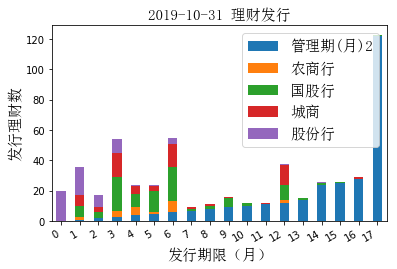

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


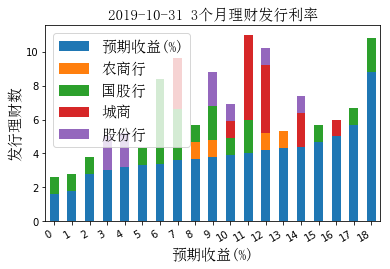

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


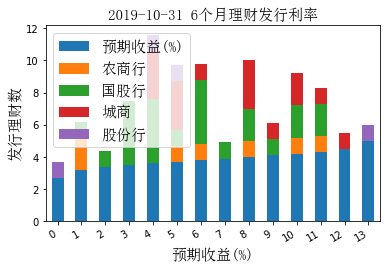

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


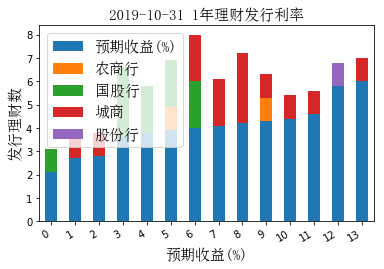

In [11]:
# -*- coding: cp936 -*-
import pandas as pd
from bs4 import BeautifulSoup
import urllib
import requests
from pymongo import MongoClient
import cgi,time
import re,datetime,json
from math import  floor
from matplotlib.font_manager import FontProperties  
import matplotlib.pyplot as plt

shijian=time.strftime('%Y-%m-%d',time.localtime(time.time()))
print(shijian)
client=MongoClient('mongodb://root:' + '5768116' + '@121.196.220.14')
db = client.hexunlicai
collection = db.hexunlicai
collection.remove({'爬取日期':{'$lt':shijian}})  #删除早于该时间点的数据

db2 = client.hexunlicai_zong
collection2 = db2.hexunlicai_zong

db3 = client.cundanbank
collection3 = db3.cundanbank
cursor = collection3.find()
cundanbank_df= pd.DataFrame(list(cursor))

db4 = client.hexunlicai_qi
collection4= db4.hexunlicai_qi



db5= client.hexunlicai_lilv
collection5= db5.hexunlicai_lilv






cursor = collection.find({ "$and":[{'爬取日期':shijian} ] })
licai_df= pd.DataFrame(list(cursor)) 
if licai_df.empty:
    yemian=0
else:
    yemian=max(licai_df['页面'].tolist())


maxtry=30
headers = {'User-Agent':'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US; rv:1.9.1.6) Gecko/20091201 Firefox/3.5.6'}    
url0="http://data.bank.hexun.com/lccp/AllLccp.aspx?col=fld_type&tag=desc&orderMarks=&page="







#从第二页开始循环
for i in range(yemian+1,90):
  url2=url0+str(i)
  print(url2)
  for tries in range(maxtry):
    try:
  
        req = urllib.request.Request(url2,headers = headers)
        menuCode=urllib.request.urlopen(req,timeout=20).read()  # 将网页源代码赋予menuCode
    except:
       if tries<(maxtry-1):
          print(tries)
          continue
       else:
          print("Has tried %d times to access  %s, all failed!"%( maxtry, url2))
          print(tries)
          stop 
        
  soup=BeautifulSoup(menuCode,'html.parser')  # 使用html解析器进行解析
  pattern = '[0-9][0-9][0-9][0-9][0-9][0-9].shtml'
  trSoup = soup.find("table", id="Table1")

  if trSoup is None:
          print('结束')
          break
  foundAllTr1 = trSoup.findAll("tr")


 #获取标题 
  mingzi1= foundAllTr1[0].findAll("th")
#获取第一条理财信息
  for url in foundAllTr1[1].find_all("a"):
                url_search = re.search(pattern,str(url.get('href')))
                if url_search:         
                    url='http://data.bank.hexun.com/lccp/'+str(url.get('href'))
                    lian=url
                    
  Td1=foundAllTr1[1].findAll("td")
  zong0=pd.DataFrame({mingzi1[0].get_text(): [Td1[0].get_text()],
                                mingzi1[1].get_text(): [Td1[1].get_text()],
                                mingzi1[2].get_text(): [Td1[2].get_text()],
                                mingzi1[3].get_text(): [Td1[3].get_text()],
                                mingzi1[4].get_text(): [Td1[4].get_text()],
                                mingzi1[5].get_text(): [Td1[5].get_text()],
                                mingzi1[6].get_text(): [Td1[6].get_text()],
                                mingzi1[7].get_text(): [Td1[7].get_text()],
                                mingzi1[8].get_text(): [Td1[8].get_text()],
                                '链接':lian,
                                '爬取日期':shijian,
                                '页面':i
                      })
 # print(zong0)

#循环获取后面几条信息
  for j in range(2,len(foundAllTr1)):
     for url in foundAllTr1[j].find_all("a"):
                url_search = re.search(pattern,str(url.get('href')))
                if url_search:         
                    url='http://data.bank.hexun.com/lccp/'+str(url.get('href'))
                    lian=url
     Td1=foundAllTr1[j].findAll("td")

  #   if lian not in licail:
     zong1=pd.DataFrame({mingzi1[0].get_text(): [Td1[0].get_text()],
                                mingzi1[1].get_text(): [Td1[1].get_text()],
                                mingzi1[2].get_text(): [Td1[2].get_text()],
                                mingzi1[3].get_text(): [Td1[3].get_text()],
                                mingzi1[4].get_text(): [Td1[4].get_text()],
                                mingzi1[5].get_text(): [Td1[5].get_text()],
                                mingzi1[6].get_text(): [Td1[6].get_text()],
                                mingzi1[7].get_text(): [Td1[7].get_text()],
                                mingzi1[8].get_text(): [Td1[8].get_text()],
                                '链接':lian,
                                '爬取日期':shijian,
                                '页面':i
                      })


   
     zong0=pd.concat([zong0,zong1])
  #zong00=pd.concat([zong00,zong0])
  zong0= zong0.reset_index(drop=True)    #重新定义索引
  records = json.loads(zong0.T.to_json()).values() 
  collection.insert(records)


  
#print(zong00)
#zong00.to_csv('dd.csv')







font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15) #用于在散点图中输出中文



cursor = collection2.find({ "$and":[{'date':shijian} ] })
hexunlicai_zong= pd.DataFrame(list(cursor)) 
if hexunlicai_zong.empty:
    yemian=0
    cursor = collection.find({ "$and":[{'爬取日期':shijian} ] })
    result= pd.DataFrame(list(cursor)) 


        
    result['停售日'] = pd.to_datetime(result['停售日'])   #转换为日期格式

    result=result[(result['停售日']>shijian )&(result['管理期(月)']!='--')&(result['预期收益(%)']!='--')]

#把管理月的两位小数改成0位小数
    result['管理期(月)2'] =result['管理期(月)'].astype('float') 
    result=result.round({'管理期(月)2':0})
    result['管理期(月)2'] =result['管理期(月)2'].astype('int')
    result['预期收益(%)'] =result['预期收益(%)'].astype('float') 




    result= result.reset_index(drop=True)    #重新定义索引
    for i in range(0,len(result)):
        result.loc[i,'行类']='城商'
        for j in range(0,len(cundanbank_df)):
          if cundanbank_df.astype(str).loc[j,'银行'].strip() in result.loc[i,'银行']:
            result.loc[i,'行类']=cundanbank_df.astype(str).loc[j,'分类2'].strip()
            break



#制作数据表
        
    resultz=result[(result['行类']!='外资行')&((result['管理期(月)2']==3)|(result['管理期(月)2']==6)|(result['管理期(月)2']==12))]
#一、三个月
    result3y=resultz[resultz['管理期(月)2']==3]
    mean=result3y['预期收益(%)'].mean()
    std=result3y['预期收益(%)'].std()
    result3y=result3y[(result3y['预期收益(%)']<(mean+std))&(result3y['预期收益(%)']>(mean-std))]

    result3y = result3y.reset_index(drop=False)    #重新定义索引




    #1.算标准差、平均数
    result3y1=result3y['预期收益(%)'].groupby([result3y['行类']]).size().fillna(0)
    result3y1 = result3y1.reset_index(drop=False)    #重新定义索引
    result3y1.rename(columns={'预期收益(%)': '发行数'}, inplace=True)
    result3y1 = result3y1.set_index('行类')    #重新定义索引

    result3y2=result3y['预期收益(%)'].groupby([result3y['行类']]).std().fillna(0)
    result3y2 = result3y2.reset_index(drop=False)    #重新定义索引
    result3y2.rename(columns={'预期收益(%)': '标准差'}, inplace=True)
    result3y2 = result3y2.set_index('行类')    #重新定义索引

    result3y3=result3y['预期收益(%)'].groupby([result3y['行类']]).mean().fillna(0)
    result3y3 = result3y3.reset_index(drop=False)    #重新定义索引
    result3y3.rename(columns={'预期收益(%)': '平均数'}, inplace=True)
    result3y3 = result3y3.set_index('行类')    #重新定义索引

    result3y3= pd.concat([result3y1, result3y2,result3y3], axis=1)
    result3y3 = result3y3.reset_index(drop=False)    #重新定义索引

    #2.清洗数据
    for i in range(0,len(result3y)):
       for j in range(0,len(result3y3)):
           if result3y.loc[i,'行类']==result3y3.loc[j,'行类']:
               result3y.loc[i,'筛选1'] = (result3y3.loc[j,'平均数']-result3y3.loc[j,'标准差'])
               result3y.loc[i,'筛选2'] = (result3y3.loc[j,'平均数']+result3y3.loc[j,'标准差'])
               break

    result3y=result3y[(result3y['预期收益(%)']<result3y['筛选2'])&(result3y['预期收益(%)']>result3y['筛选1'])]
    result3y3x=result3y['预期收益(%)'].groupby([result3y['行类']]).mean().fillna(0)
    result3y3x = result3y3x.reset_index(drop=False)    #重新定义索引


    #二、六个月
    result6y=resultz[resultz['管理期(月)2']==6]
    mean=result6y['预期收益(%)'].mean()
    std=result6y['预期收益(%)'].std()
    result6y=result6y[(result6y['预期收益(%)']<(mean+std))&(result6y['预期收益(%)']>(mean-std))]

    result6y = result6y.reset_index(drop=False)    #重新定义索引

    #1.算标准差、平均数
    result6y1=result6y['预期收益(%)'].groupby([result6y['行类']]).size().fillna(0)
    result6y1 = result6y1.reset_index(drop=False)    #重新定义索引
    result6y1.rename(columns={'预期收益(%)': '发行数'}, inplace=True)
    result6y1 = result6y1.set_index('行类')    #重新定义索引

    result6y2=result6y['预期收益(%)'].groupby([result6y['行类']]).std().fillna(0)
    result6y2 = result6y2.reset_index(drop=False)    #重新定义索引
    result6y2.rename(columns={'预期收益(%)': '标准差'}, inplace=True)
    result6y2 = result6y2.set_index('行类')    #重新定义索引

    result6y3=result6y['预期收益(%)'].groupby([result6y['行类']]).mean().fillna(0)
    result6y3 = result6y3.reset_index(drop=False)    #重新定义索引
    result6y3.rename(columns={'预期收益(%)': '平均数'}, inplace=True)
    result6y3 = result6y3.set_index('行类')    #重新定义索引

    result6y3= pd.concat([result6y1, result6y2,result6y3], axis=1)
    result6y3 = result6y3.reset_index(drop=False)    #重新定义索引

    #2.清洗数据
    for i in range(0,len(result6y)):
       for j in range(0,len(result6y3)):
           if result6y.loc[i,'行类']==result6y3.loc[j,'行类']:
               result6y.loc[i,'筛选1'] = (result6y3.loc[j,'平均数']-result6y3.loc[j,'标准差'])
               result6y.loc[i,'筛选2'] = (result6y3.loc[j,'平均数']+result6y3.loc[j,'标准差'])
               break

    result6y=result6y[(result6y['预期收益(%)']<result6y['筛选2'])&(result6y['预期收益(%)']>result6y['筛选1'])]
    result6y3x=result6y['预期收益(%)'].groupby([result6y['行类']]).mean().fillna(0)
    result6y3x = result6y3x.reset_index(drop=False)    #重新定义索引




    #三、12个月
    result12y=resultz[resultz['管理期(月)2']==12]
    mean=result12y['预期收益(%)'].mean()
    std=result12y['预期收益(%)'].std()
    result12y=result12y[(result12y['预期收益(%)']<(mean+std))&(result12y['预期收益(%)']>(mean-std))]

    result12y = result12y.reset_index(drop=False)    #重新定义索引

    #1.算标准差、平均数
    result12y1=result12y['预期收益(%)'].groupby([result12y['行类']]).size().fillna(0)
    result12y1 = result12y1.reset_index(drop=False)    #重新定义索引
    result12y1.rename(columns={'预期收益(%)': '发行数'}, inplace=True)
    result12y1 = result12y1.set_index('行类')    #重新定义索引

    result12y2=result12y['预期收益(%)'].groupby([result12y['行类']]).std().fillna(0)
    result12y2 = result12y2.reset_index(drop=False)    #重新定义索引
    result12y2.rename(columns={'预期收益(%)': '标准差'}, inplace=True)
    result12y2 = result12y2.set_index('行类')    #重新定义索引

    result12y3=result12y['预期收益(%)'].groupby([result12y['行类']]).mean().fillna(0)
    result12y3 = result12y3.reset_index(drop=False)    #重新定义索引
    result12y3.rename(columns={'预期收益(%)': '平均数'}, inplace=True)
    result12y3 = result12y3.set_index('行类')    #重新定义索引

    result12y3= pd.concat([result12y1, result12y2,result12y3], axis=1)
    result12y3 = result12y3.reset_index(drop=False)    #重新定义索引
    print('12月发行数表')

    print(result12y3)
    #2.清洗数据
    for i in range(0,len(result12y)):
       for j in range(0,len(result12y3)):
           if result12y.loc[i,'行类']==result12y3.loc[j,'行类']:
               result12y.loc[i,'筛选1'] = (result12y3.loc[j,'平均数']-result12y3.loc[j,'标准差'])
               result12y.loc[i,'筛选2'] = (result12y3.loc[j,'平均数']+result12y3.loc[j,'标准差'])
               break

    result12y=result12y[(result12y['预期收益(%)']<result12y['筛选2'])&(result12y['预期收益(%)']>result12y['筛选1'])]
    result12y3x=result12y['预期收益(%)'].groupby([result12y['行类']]).mean().fillna(0)
    result12y3x = result12y3x.reset_index(drop=False)    #重新定义索引
    print('12月利率表')
    print(result12y3x)

    #3.合表
    result12y3x=result12y3x.set_index('行类')
    result12y3=result12y3.set_index('行类')
    result12z= pd.concat([result12y3x,result12y3], axis=1)
    result12z['期限']='12个月'


    result6y3x=result6y3x.set_index('行类')
    result6y3=result6y3.set_index('行类')
    result6z= pd.concat([result6y3x,result6y3], axis=1)
    result6z['期限']='6个月'


    result3y3x=result3y3x.set_index('行类')
    result3y3=result3y3.set_index('行类')
    result3z= pd.concat([result3y3x,result3y3], axis=1)
    result3z['期限']='3个月'


    print(result3z)

    resultz= pd.concat([result3z,result6z,result12z], axis=0)
    print(resultz)

    resultz['日期']=shijian
    resultz =resultz.reset_index(drop=False)    #重新定义索引

    resultz=resultz.set_index('日期')
    
    resultz.rename(columns={'index': '行类'}, inplace=True)

    print(resultz)
    #resultz=resultz[['行类','预期收益(%)','发行数','期限']]

    resultz= resultz.reset_index(drop=False)    #重新定义索引
    records = json.loads(resultz.T.to_json()).values() 
    collection5.insert(records)













#把总表输入到数据库
        
    test5 = result['链接'].groupby([result['管理期(月)2'],result['行类']]).size().unstack('行类').fillna(0)

    test5['date']=shijian
    test5= test5.reset_index(drop=False)    #重新定义索引
    records = json.loads(test5.T.to_json()).values() 
    collection2.insert(records)


#总表画图
    test5.plot(kind='bar', alpha=1,stacked=True)
    plt.legend(prop=font_set)  #显示lable
    plt.xlabel('发行期限（月）',fontproperties=font_set)
    plt.ylabel('发行理财数',fontproperties=font_set)
    plt.title('%s 理财发行'%shijian, fontproperties=font_set) 
    plt.gcf().autofmt_xdate()  # 自动旋转日期标记
    plt.savefig('licaihuatu.png')
    plt.show()


#把三个月的总数据输入数据库
    licai3=result[(result['管理期(月)2']==3)]
    licai3['预期收益(%)'] =licai3['预期收益(%)'].astype('float')
    licai3=licai3.round({'预期收益(%)':1})
    licai3=licai3['链接'].groupby([licai3['预期收益(%)'],licai3['行类']]).size().unstack('行类').fillna(0)
    licai3['date']=shijian
    licai3['期限']='3个月'

    licai3= licai3.reset_index(drop=False)    #重新定义索引

    records = json.loads(licai3.T.to_json()).values() 
    collection4.insert(records)

    licai3.plot(kind='bar', alpha=1,stacked=True)
    plt.legend(prop=font_set)  #显示lable
    plt.xlabel('预期收益(%)',fontproperties=font_set)
    plt.ylabel('发行理财数',fontproperties=font_set)
    plt.title('%s 3个月理财发行利率'%shijian, fontproperties=font_set) 
    plt.gcf().autofmt_xdate()  # 自动旋转日期标记
    plt.savefig('licaili3.png')
    plt.show()

#六个月的画利率银行类别图
    licai3=result[(result['管理期(月)2']==6)]
    licai3['预期收益(%)'] =licai3['预期收益(%)'].astype('float') 
    licai3=licai3.round({'预期收益(%)':1})

    licai3=licai3['链接'].groupby([licai3['预期收益(%)'],licai3['行类']]).size().unstack('行类').fillna(0)
    licai3['date']=shijian
    licai3['期限']='6个月'

    licai3= licai3.reset_index(drop=False)    #重新定义索引

    records = json.loads(licai3.T.to_json()).values() 
    collection4.insert(records)
    
    licai3.plot(kind='bar', alpha=1,stacked=True)
    plt.legend(prop=font_set)  #显示lable
    plt.xlabel('预期收益(%)',fontproperties=font_set)
    plt.ylabel('发行理财数',fontproperties=font_set)
    plt.title('%s 6个月理财发行利率'%shijian, fontproperties=font_set) 
    plt.gcf().autofmt_xdate()  # 自动旋转日期标记
    plt.savefig('licaili6.png')
    plt.show()

#1年的画利率银行类别图
    licai3=result[(result['管理期(月)2']==12)]
    licai3['预期收益(%)'] =licai3['预期收益(%)'].astype('float') 
    licai3=licai3.round({'预期收益(%)':1})

    licai3=licai3['链接'].groupby([licai3['预期收益(%)'],licai3['行类']]).size().unstack('行类').fillna(0)
    licai3['date']=shijian
    licai3['期限']='12个月'

    licai3= licai3.reset_index(drop=False)    #重新定义索引

    records = json.loads(licai3.T.to_json()).values() 
    collection4.insert(records)
    
    licai3.plot(kind='bar', alpha=1,stacked=True)
    plt.legend(prop=font_set)  #显示lable
    plt.xlabel('预期收益(%)',fontproperties=font_set)
    plt.ylabel('发行理财数',fontproperties=font_set)
    plt.title('%s 1年理财发行利率'%shijian, fontproperties=font_set) 
    plt.gcf().autofmt_xdate()  # 自动旋转日期标记
    plt.savefig('licaili12.png')
    plt.show()






    
else:
    print('已经更新!')






# 下载票交所收益率曲线 

In [9]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib
import requests
from pymongo import MongoClient
import cgi
import re,datetime,json
from math import  floor
#设置try的次数
maxTryNum=20
maxTryNum1=6
st=0
import time, sched
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter

#import jieba,os,codecs,re
#import jieba.analyse,time
#import json,csv,re,time,datetime
#from wordcloud import WordCloud

import arrow #datatime的加强版
xlsname=''


#二、用下载下来 excel更新数据

nomonth = arrow.now()   #当前月
yuefen=[]
yuefen.append(nomonth.month)
for i in range(1,13): 
    yuefen.append(nomonth.shift(months=i).month)
print(yuefen)
qixianxin=['月内(%s月到期)'%yuefen[0],'1M/12月','2M/12月','3M/1月','4M/2月','5M/3月','6M/4月','7M/5月','8M/6月','9M/7月','10M/8月','11M/9月','10M/10月']
print(qixianxin)

import matplotlib as mpl   #显示中文

from matplotlib.font_manager import FontProperties  
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=9) #用于在散点图中输出中文


font_set2 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=9) #用于在散点图中输出中文
shijian=time.strftime('%Y-%m-%d',time.localtime(time.time()))
shijian = datetime.datetime.strptime(shijian, "%Y-%m-%d")
shijian2=shijian-datetime.timedelta(days=7)
shijian2=str(shijian2.strftime("%Y-%m-%d"))
shijian=str(shijian.strftime("%Y-%m-%d"))

zixun=''
client=MongoClient('mongodb://root:' + '5768116' + '@121.196.220.14')
db = client.piaofen
collection = db.piaofen

db18=client.lilvquxian
collection18 = db18.lilvquxian

#一、更新利率曲线    
shijian=time.strftime('%Y-%m-%d',time.localtime(time.time()))
import datetime
shijian = datetime.datetime.strptime(shijian, "%Y-%m-%d")

jin=input('    请输入当日日期,输入格式为“2017-01-01”，不输入默认为今天:')
if jin!='':
        shijian0=jin
        shijian=datetime.datetime.strptime(jin , "%Y-%m-%d")

shijian=str(shijian.strftime("%Y-%m-%d"))





headers = {'User-Agent':'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US; rv:1.9.1.6) Gecko/20091201 Firefox/3.5.6'}    
url2="http://www.shcpe.com.cn/index_132.html"

for tries in range(maxTryNum):
            try:
                req = urllib.request.Request(url2,headers = headers)
                menuCode=urllib.request.urlopen(req).read()  # 将网页源代码赋予menuCode     
                soup=BeautifulSoup(menuCode,'html.parser')  # 使用html解析器进行解析
                data = soup.prettify()
                break
            except:
                if tries < (maxTryNum - 1):
                    print(tries)
                    continue
                else:
                    print("Has tried %d times to access url %s, all failed!", maxTryNum, url2)
                    print(tries)
                    break

link_list =re.findall(r"(?<=href=\").+?(?=\")|(?<=href=\').+?(?=\')" ,data)  # 利用正则查找所有连接
for url in link_list:
      if ('uploadfiles' in url) and( '.xls'  in url):
          url=url2+url
          url=url.replace('index_132.html/','')
          print(url)
          
          time.sleep(1)  # 暂停一秒，避免访问过快被反爬机制认为是蜘蛛
          xlsname='D:\\downloadFiles\\'+url[(len(url)-20):]
          print(xlsname)
          if shijian.replace('-','') not in xlsname:
              print(shijian.replace('-',''))
              print(xlsname)
              print('还没有更新，停止')
              break
                
          opener=urllib.request.build_opener()
          opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
          urllib.request.install_opener(opener)
          urllib.request.urlretrieve(url,xlsname)




[10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['月内(10月到期)', '1M/12月', '2M/12月', '3M/1月', '4M/2月', '5M/3月', '6M/4月', '7M/5月', '8M/6月', '9M/7月', '10M/8月', '11M/9月', '10M/10月']
    请输入当日日期,输入格式为“2017-01-01”，不输入默认为今天:
http://www.shcpe.com.cn/uploadfiles/2019/10/2019103118030838.xls
D:\downloadFiles\2019103118030838.xls


# 票交所收益率曲线上传

In [10]:

db18=client.lilvquxian
collection18 = db18.lilvquxian

def lilvgengxin():
    global lilvd,collection18
    print('开始执利率曲线更新程序……')

    lilv=pd.read_excel(xlsname,encoding='GB18030')


    for i in range(2,len(lilv)):
        lilv.loc[i,'关键期限']=lilv.loc[i,'关键期限'].replace('1Y','12M').replace('M','月')
        #lilv.loc[i,'关键期限']='%s月'%yuefen[int(lilv.loc[i,'关键期限'].replace('M',''))]

    print(lilv)


    lilv['日期'] = pd.to_datetime(lilv['日期']).astype('str')     #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
    print(lilv.loc[1,'日期'])
    cursor = collection18.find({ "$and":[{'日期':str(lilv.loc[1,'日期'])} ] })
    lilvd=lilv[['关键期限','利率（%）']]
    lilvqu= pd.DataFrame(list(cursor))
    print(lilvqu)
    
    lilvd = lilvd.set_index('关键期限').T.to_dict('list')
    print(lilvd)
    zong1=pd.DataFrame({lilv.loc[0,'关键期限']: [lilv.loc[0,'利率（%）']],
                             lilv.loc[1,'关键期限']: [lilv.loc[1,'利率（%）']],
                             lilv.loc[2,'关键期限']: [lilv.loc[2,'利率（%）']],
                             lilv.loc[3,'关键期限']: [lilv.loc[3,'利率（%）']],
                             lilv.loc[4,'关键期限']: [lilv.loc[4,'利率（%）']],
                             lilv.loc[5,'关键期限']: [lilv.loc[5,'利率（%）']],
                             lilv.loc[6,'关键期限']: [lilv.loc[6,'利率（%）']],
                             lilv.loc[7,'关键期限']: [lilv.loc[7,'利率（%）']],
                             lilv.loc[8,'关键期限']: [lilv.loc[8,'利率（%）']],
                             lilv.loc[9,'关键期限']: [lilv.loc[9,'利率（%）']],
                             lilv.loc[10,'关键期限']: [lilv.loc[10,'利率（%）']],
                             lilv.loc[11,'关键期限']: [lilv.loc[11,'利率（%）']],
                             lilv.loc[12,'关键期限']: [lilv.loc[12,'利率（%）']],
                             lilv.loc[13,'关键期限']: [lilv.loc[13,'利率（%）']],

                            '日期':[lilv.loc[1,'日期']]
                            
                         })


    if lilvqu.empty:
        records = json.loads(zong1.T.to_json()).values()
        collection18.insert(records)
    else:
        print('已经更新过')
lilvgengxin()

开始执利率曲线更新程序……
           日期 关键期限     利率（%）    收益率（%）
0  2019-10-31   1D  1.800000  1.800090
1  2019-10-31   7D  1.990267  1.991037
2  2019-10-31   1月  2.002279  2.005737
3  2019-10-31   2月  2.017795  2.024831
4  2019-10-31   3月  2.543415  2.560055
5  2019-10-31   4月  2.568715  2.591459
6  2019-10-31   5月  2.593199  2.622097
7  2019-10-31   6月  2.621850  2.657462
8  2019-10-31   7月  2.635537  2.677684
9  2019-10-31   8月  2.648782  2.697407
10 2019-10-31   9月  2.678499  2.734655
11 2019-10-31  10月  2.675707  2.737979
12 2019-10-31  11月  2.672823  2.741414
13 2019-10-31  12月  2.670217  2.744520
2019-10-31
Empty DataFrame
Columns: []
Index: []
{'1D': [1.8], '7D': [1.99026680543649], '1月': [2.00227893205882], '2月': [2.01779459561265], '3月': [2.54341539149491], '4月': [2.56871528752342], '5月': [2.59319905787359], '6月': [2.62185040404999], '7月': [2.63553712275117], '8月': [2.64878233439746], '9月': [2.67849884492108], '10月': [2.67570727244828], '11月': [2.67282264755971], '12月': [2.67021717991843